$\hspace{98mm}$ ***ΥΣ11 Τεχνικές Εξόρυξης Δεδομένων: 2η Εργασία***
$ $

$\hspace{105mm}$ ***Παναγιώτα Γύφτου, Α.Μ 1115201900318***
$ $

$\hspace{130mm}$ ***Ιούνιος 2023*** 

$ $



In [1]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import re

import matplotlib 
%matplotlib inline 

from matplotlib import pyplot as plt
from matplotlib import colors
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from google.colab import drive
drive.mount('/content/drive')

!pip install contractions

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
myFile ="/content/drive/MyDrive/DataTede2023/books_1.Best_Books_Ever.csv"
dataframe = pd.read_csv(myFile, sep=',')      # save without comma!

In [3]:
# Επιβεβαιώστε ότι έχει γίνει σωστά η εισαγωγή τρέχοντας το τρέχον κελί.
# Η έξοδος του κελιού πρέπει να είναι της μορφής:
# Python version 3.X.X (default, MM DD YYYY, HH:MM:SS)
# Matplotlib version 3.X.X
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
Pandas version 1.5.3
Matplotlib version 3.7.1


# Προεπεξεργασία

#### Καθάρισμα

In [4]:
print(f"Check for missing values\n: {dataframe.isnull().sum()}")

# Το μέγεθος της σχέσης df πριν τις αλλαγές
rows, columns = dataframe.shape
print(f"The size of the dataframe before the changes: \n(Rows: {rows} , Columns: {columns})\n") 

# Διαγραφή πλειάδων που έχουν ελλιπή δεδομένα
dataframe = dataframe.dropna(subset=['bookId', 'title', 'author', 'rating', 'description', 'language', 'isbn', 
                                     'pages', 'publisher', 'publishDate', 'numRatings', 'firstPublishDate'])

dataframe = dataframe[(dataframe[['ratingsByStars']] != '[]').all(axis=1)]
dataframe = dataframe[(dataframe[['genres']] != '[]').all(axis=1)]

# Το μέγεθος της σχέσης df μετά τις αλλαγές
rows, columns = dataframe.shape
print(f"The size of the dataframe after the changes: \n(Rows: {rows} , Columns: {columns})\n") 

print(f"Check for missing values\n: {dataframe.isnull().sum()}")


Check for missing values
: bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64
The size of the dataframe before the changes: 
(Rows: 52478 , Columns: 25)

The size of the dataframe after the changes: 
(Rows: 26759 , Columns: 25)

Check for missing values
: bookId                  0
title                   0
series              15132
author                  0
rating                  0
de

In [5]:
# μετρατροπή συμβολοσειρών σε ακέραιους αριθμόυς σελίδων
def convert(pages:str) -> int:
  
  #  "1 page" -->> 1 
  if "pages" in pages or "page" in pages:
    Pages = re.findall(r'\d+', pages)
    num_pages = int(Pages[0])
    return num_pages
  else: 
    return int(pages)

dataframe['numeric_pages'] = dataframe.apply(lambda row: convert(row['pages']), axis=1)

#### Προεπεξεργασία

**Α.** $\ \ $ **ratingStar1, $ $ ratingStar2, $ $  ratingStar3, $ $ ratingStar4, $ $ ratingStar5**

In [6]:
def Split_ratingsByStars(ratings:str, i: int) -> str:
  
  ratings = ratings[1:len(ratings)-1]   # αφαίρεση των: '[]'
  
  Ratings = ''
  
  # αφαίρεση των ' 
  for character in ratings:
    if character != "'":
      Ratings = Ratings + character
  
  # αποθήκευση όλων των στοιχείων που είναι χωρισμένα με κόμμα, στη λίστα ListRatings
  ListRatings = list(Ratings.split(", "))
  
  return ListRatings[i]   # επιστροφή της ζητούμενης τιμής


for i in range(5):
  
  # δημιουργία ονόματος στήλης, πχ  i = 0 -->> ratingStar1, i = 1 -->> ratingStar2 ....
  num = str(i+1) 
  full_name = 'ratingStar' + num
  
  # εύρεση των τιμών της στήλης και προσθήκη σε αυτή
  dataframe[full_name] = dataframe.apply(lambda row: Split_ratingsByStars(row['ratingsByStars'], i), axis=1)

# Εκτύπωση του ανανεωμένου πίνακα!
dataframe.head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,coverImg,bbeScore,bbeVotes,price,numeric_pages,ratingStar1,ratingStar2,ratingStar3,ratingStar4,ratingStar5
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,870,1593642,637516,222366,39573,14526
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,324,2363896,1333153,573280,149952,80794
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,279,1617567,816659,373311,113934,76770
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,501,1751460,1113682,1008686,542017,548674
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8,552,1048230,524674,186297,48864,26211
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42,141,986764,958699,545475,165093,84682
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","['Polly', 'Aslan', 'Lucy Pevensie', 'Edmund Pe...",...,https://i.gr-assets.com/images/S/compressed.ph...,1238556,12949,NaN,767,254964,167572,74362,15423,5419
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9780345538376,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,https://i.gr-assets.com/images/S/compressed.ph...,1159802,12111,21.15,1728,78217,22857,6628,1477,967
9,18405.Gone_with_the_Wind,Gone with the Wind,NaN,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,9780446675536,"['Classics', 'Historical Fiction', 'Fiction', ...","[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...",...,https://i.gr-assets.com/images/S/compressed.ph...,1087732,11211,5.58,1037,602138,275517,133535,39008,24422
11,386162.The_Hitchhiker_s_Guide_to_the_Galaxy,The Hitchhiker's Guide to the Galaxy,The Hitchhiker's Guide to the Galaxy #1,Douglas Adams,4.22,Seconds before the Earth is demolished to make...,English,9999999999999,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","['Zaphod Beeb

$ $

**B.** $ \ \ $ **genreSingle**

In [7]:
def First_Genre(genres) :
  
  Genres = genres[1:len(genres)-1]    # αφαίρεση των: '[]'
  
  # αποθήκευση όλων των στοιχείων που είναι χωρισμένα με κόμμα, στη λίστα ListGenres
  ListGenres = list(Genres.split(", "))

  genre = ListGenres[0][1:len(ListGenres[0])-1]  # εξαγωγή του πρώτου στοιχείου της ListGenres
  return genre
  
dataframe['genreSingle'] = dataframe.apply(lambda row: First_Genre(row['genres']), axis=1)

# Εκτύπωση του ανανεωμένου πίνακα!
dataframe.head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,bbeScore,bbeVotes,price,numeric_pages,ratingStar1,ratingStar2,ratingStar3,ratingStar4,ratingStar5,genreSingle
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,2632233,26923,7.38,870,1593642,637516,222366,39573,14526,Fantasy
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,2269402,23328,NaN,324,2363896,1333153,573280,149952,80794,Classics
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,1983116,20452,NaN,279,1617567,816659,373311,113934,76770,Classics
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,1459448,14874,2.1,501,1751460,1113682,1008686,542017,548674,Young Adult
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,1372809,14168,3.8,552,1048230,524674,186297,48864,26211,Historical Fiction
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,1276599,13264,4.42,141,986764,958699,545475,165093,84682,Classics
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","['Polly', 'Aslan', 'Lucy Pevensie', 'Edmund Pe...",...,1238556,12949,NaN,767,254964,167572,74362,15423,5419,Fantasy
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9780345538376,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,1159802,12111,21.15,1728,78217,22857,6628,1477,967,Fantasy
9,18405.Gone_with_the_Wind,Gone with the Wind,NaN,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,9780446675536,"['Classics', 'Historical Fiction', 'Fiction', ...","[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...",...,1087732,11211,5.58,1037,602138,275517,133535,39008,24422,Classics
11,386162.The_Hitchhiker_s_Guide_to_the_Galaxy,The Hitchhiker's Guide to the Galaxy,The Hitchhiker's Guide to the Galaxy #1,Douglas Adams,4.22,Seconds before the Earth is demolished to make...,English,9999999999999,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","['Zaphod Beeblebrox', 'Arthur Dent', 'Ford Pre...",...,1063601,10996,NaN,193,725771,420864,199846,58326,31518,Science Fiction


$ $

**Γ.** $ \ \ $ **year_of_publication**

In [8]:
def Year_Of_Publication(publish_date) :
  
  # 1. εάν η ημερομηνία είναι της μορφής mm/dd/yy -->> τότε τη τροποποιούμε στη μορφή yyyy-mm-dd 00:00:00
  if '/' in publish_date:
    format = '%m/%d/%y'
    date = datetime.strptime(publish_date, format)
    return date.year   # επιστρέφουμε μόνο το έτος 
  else:   
    numbers = re.findall(r'\d+', publish_date)   # από τη τρέχουσα ημερομηνία εξάγουμε τους αριθμούς της 
    # επιστρέφουμε των αριθμό που έχει 4 ψηφία
    for num in numbers: 
      if len(num) == 4:
        return num
      
  
dataframe['year_of_publication'] = dataframe.apply(lambda row: Year_Of_Publication(row['publishDate']), axis=1)

# Εκτύπωση του ανανεωμένου πίνακα!
dataframe.head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,bbeVotes,price,numeric_pages,ratingStar1,ratingStar2,ratingStar3,ratingStar4,ratingStar5,genreSingle,year_of_publication
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,26923,7.38,870,1593642,637516,222366,39573,14526,Fantasy,2004
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,23328,NaN,324,2363896,1333153,573280,149952,80794,Classics,2006
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,20452,NaN,279,1617567,816659,373311,113934,76770,Classics,2000
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,14874,2.1,501,1751460,1113682,1008686,542017,548674,Young Adult,2006
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,14168,3.8,552,1048230,524674,186297,48864,26211,Historical Fiction,2006
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,13264,4.42,141,986764,958699,545475,165093,84682,Classics,1996
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","['Polly', 'Aslan', 'Lucy Pevensie', 'Edmund Pe...",...,12949,NaN,767,254964,167572,74362,15423,5419,Fantasy,2002
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9780345538376,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,12111,21.15,1728,78217,22857,6628,1477,967,Fantasy,2012
9,18405.Gone_with_the_Wind,Gone with the Wind,NaN,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,9780446675536,"['Classics', 'Historical Fiction', 'Fiction', ...","[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...",...,11211,5.58,1037,602138,275517,133535,39008,24422,Classics,1999
11,386162.The_Hitchhiker_s_Guide_to_the_Galaxy,The Hitchhiker's Guide to the Galaxy,The Hitchhiker's Guide to the Galaxy #1,Douglas Adams,4.22,Seconds before the Earth is demolished to make...,English,9999999999999,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","['Zaphod Beeblebrox', 'Arthur Dent', 'Ford Pre...",...,10996,NaN,193,725771,420864,199846,58326,31518,Science Fiction,2007


# Ερωτήματα για μελέτη

**2** $ \ \ \ $ Τα 10 βιβλία με τις περισσότερες σελίδες είναι: 
$ $

$\ \ \ \ \ \ $ **1**.$ $ The Story of Civilization
$ $

$\ \ \ \ \ \ $ **2**.$ $ Animorphs
$ $

$\ \ \ \ \ \ $ **3**.$ $ Worm
$ $

$\ \ \ \ \ \ $ **4**.$ $ سه تفنگدار: ١٠ جلدی
$ $

$\ \ \ \ \ \ $ **5**.$ $ The Complete Aubrey/Maturin Novels (5 Volumes)
$ $

$\ \ \ \ \ \ $ **6**.$ $ البداية والنهاية
$ $

$\ \ \ \ \ \ $ **7**.$ $ A Song of Ice and Fire
$ $

$\ \ \ \ \ \ $ **8**.$ $ Cuentos completos 1880 -1903 [Estuche]
$ $

$\ \ \ \ \ \ $ **9**.$ $ The Second World War
$ $

$\ \ \ \ \ \ $ **10**.$ $ سير أعلام النبلاء

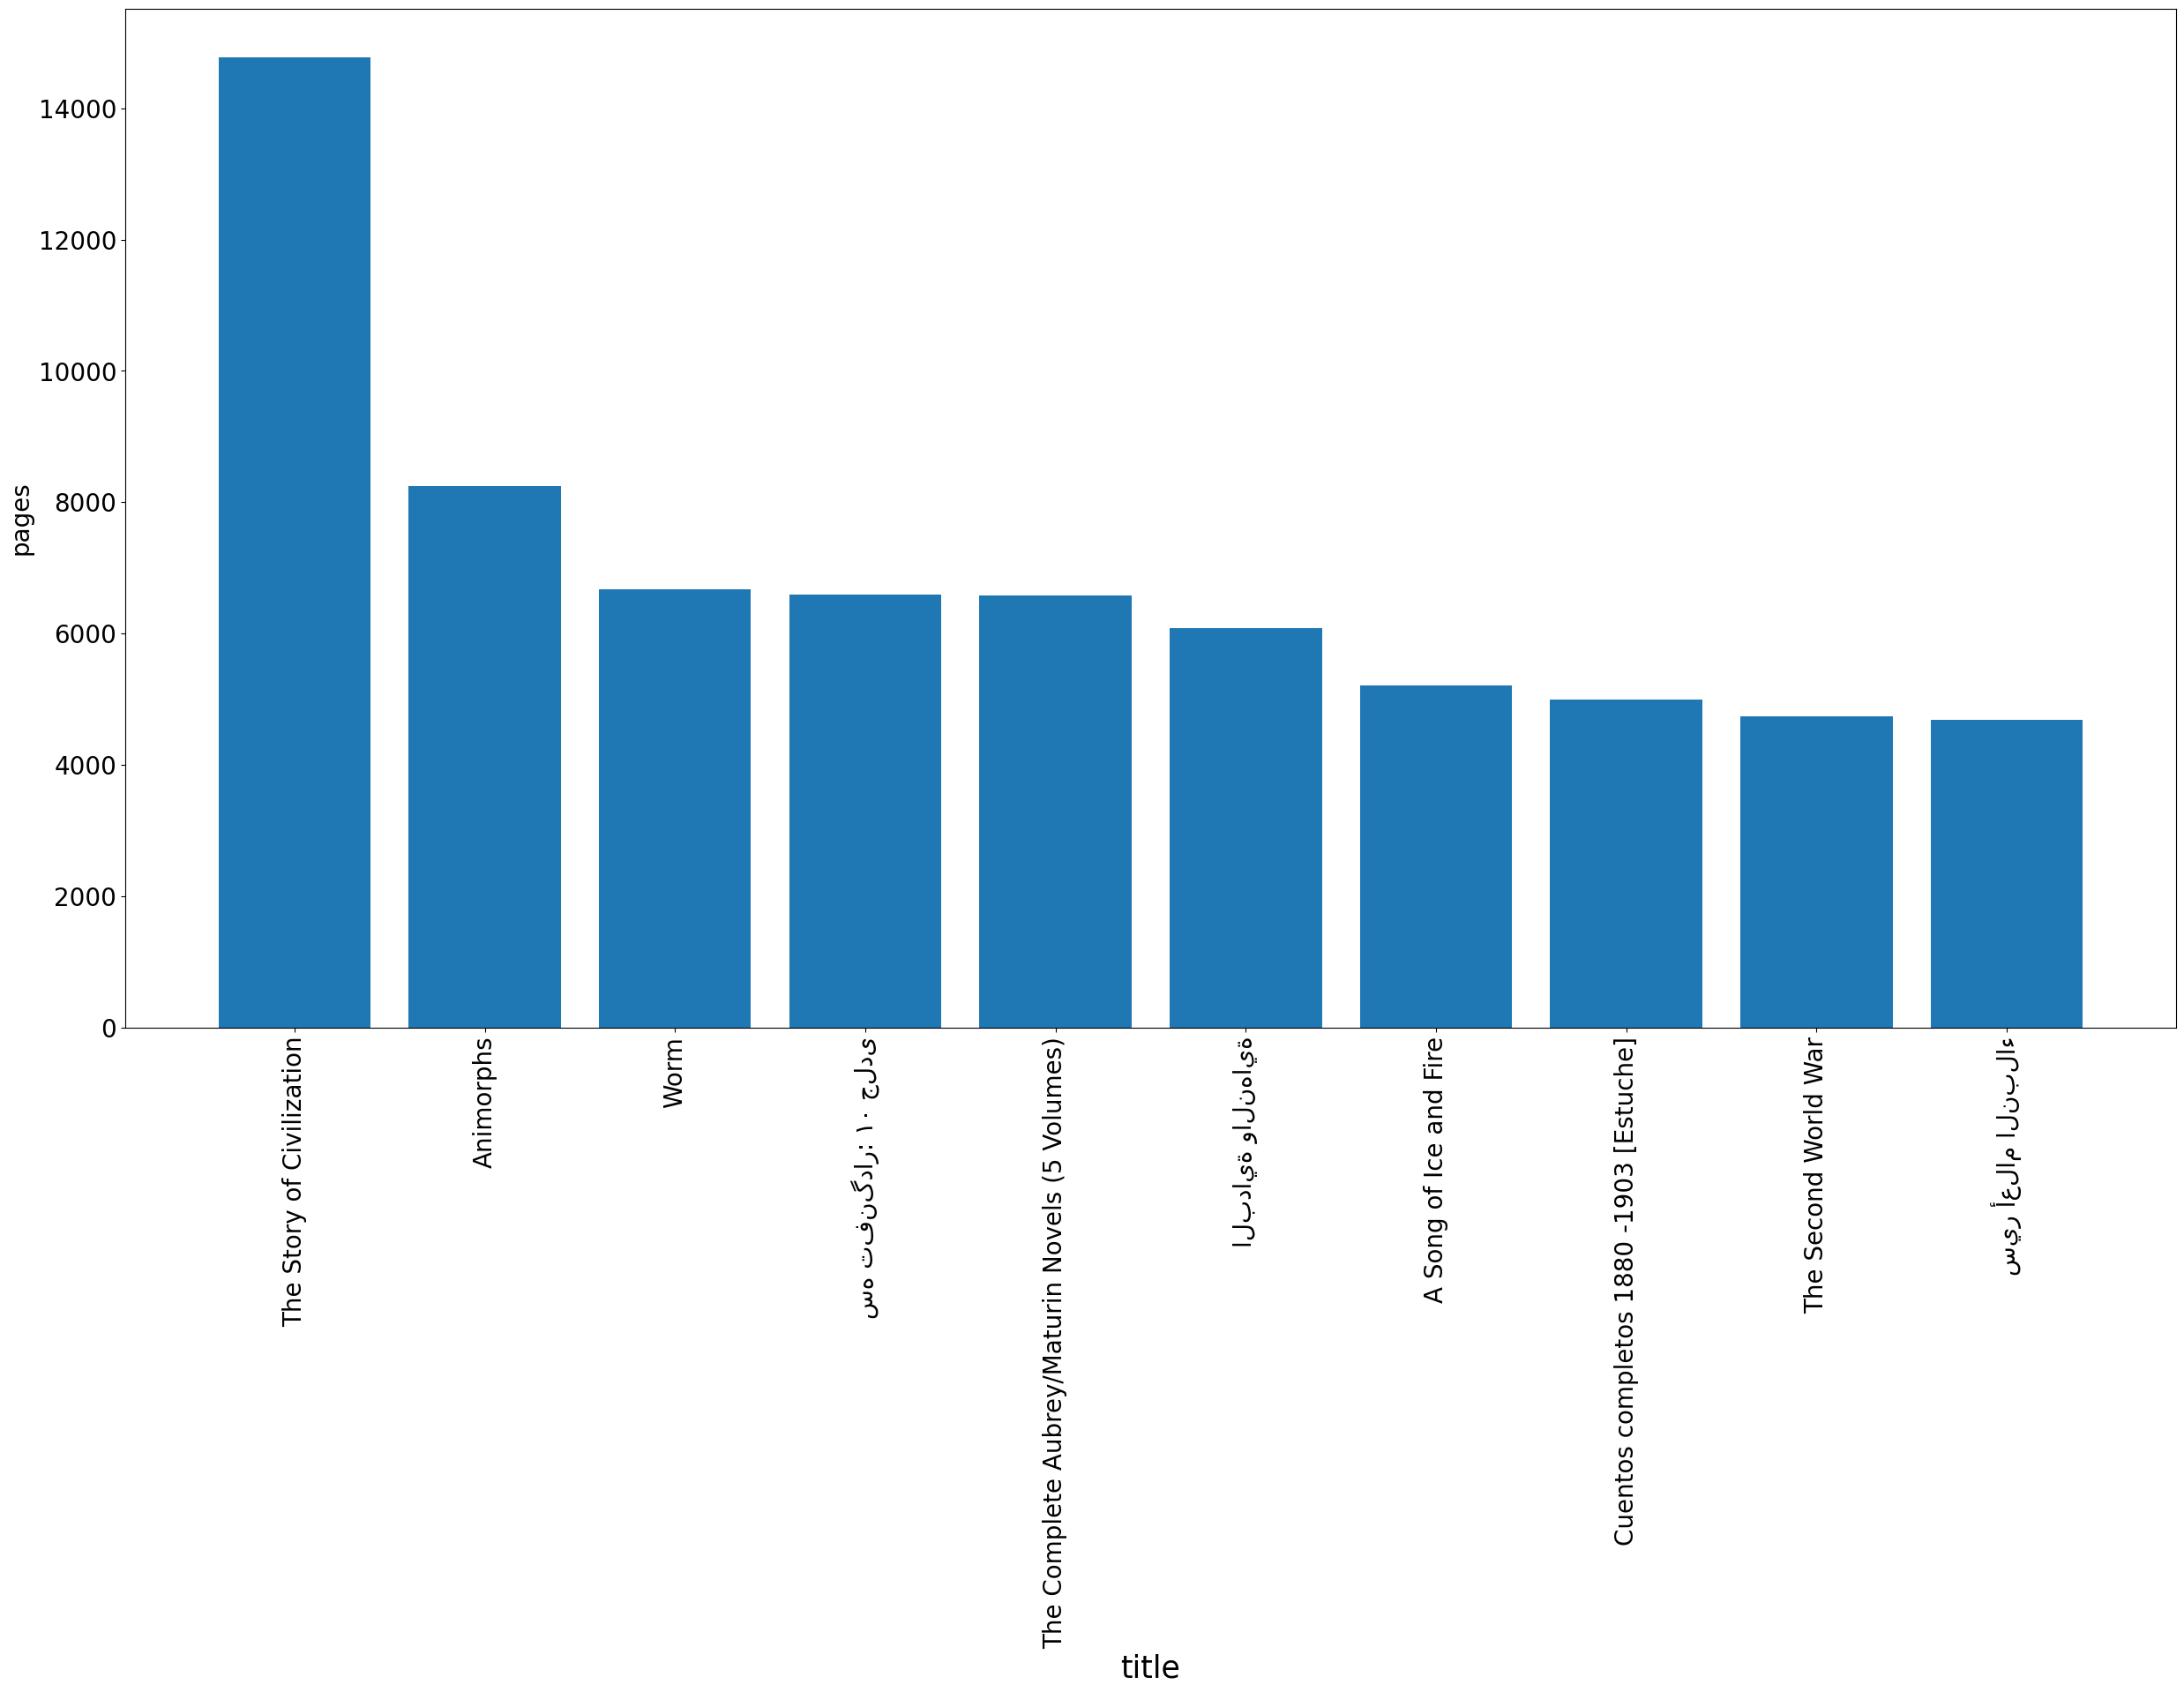

In [9]:
# 2.
df = dataframe[['title', 'numeric_pages']].copy()
df = df.sort_values(by = ['numeric_pages'], ascending=False)
df = df.head(10)

fig, ax = plt.subplots(1, 1, figsize=[30, 15])
plt.bar(df['title'], df['numeric_pages'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(rotation = 90)
ax.set_xlabel("title", fontsize=25)
ax.set_ylabel("pages", fontsize=20)

plt.show()

del df

$ $ 

**8.** $ \ \ \ $ Παρατηρούμε ότι η πιο συχνή γλώσσα που έχουν γραφτεί τα βιβλία είναι 'English' 

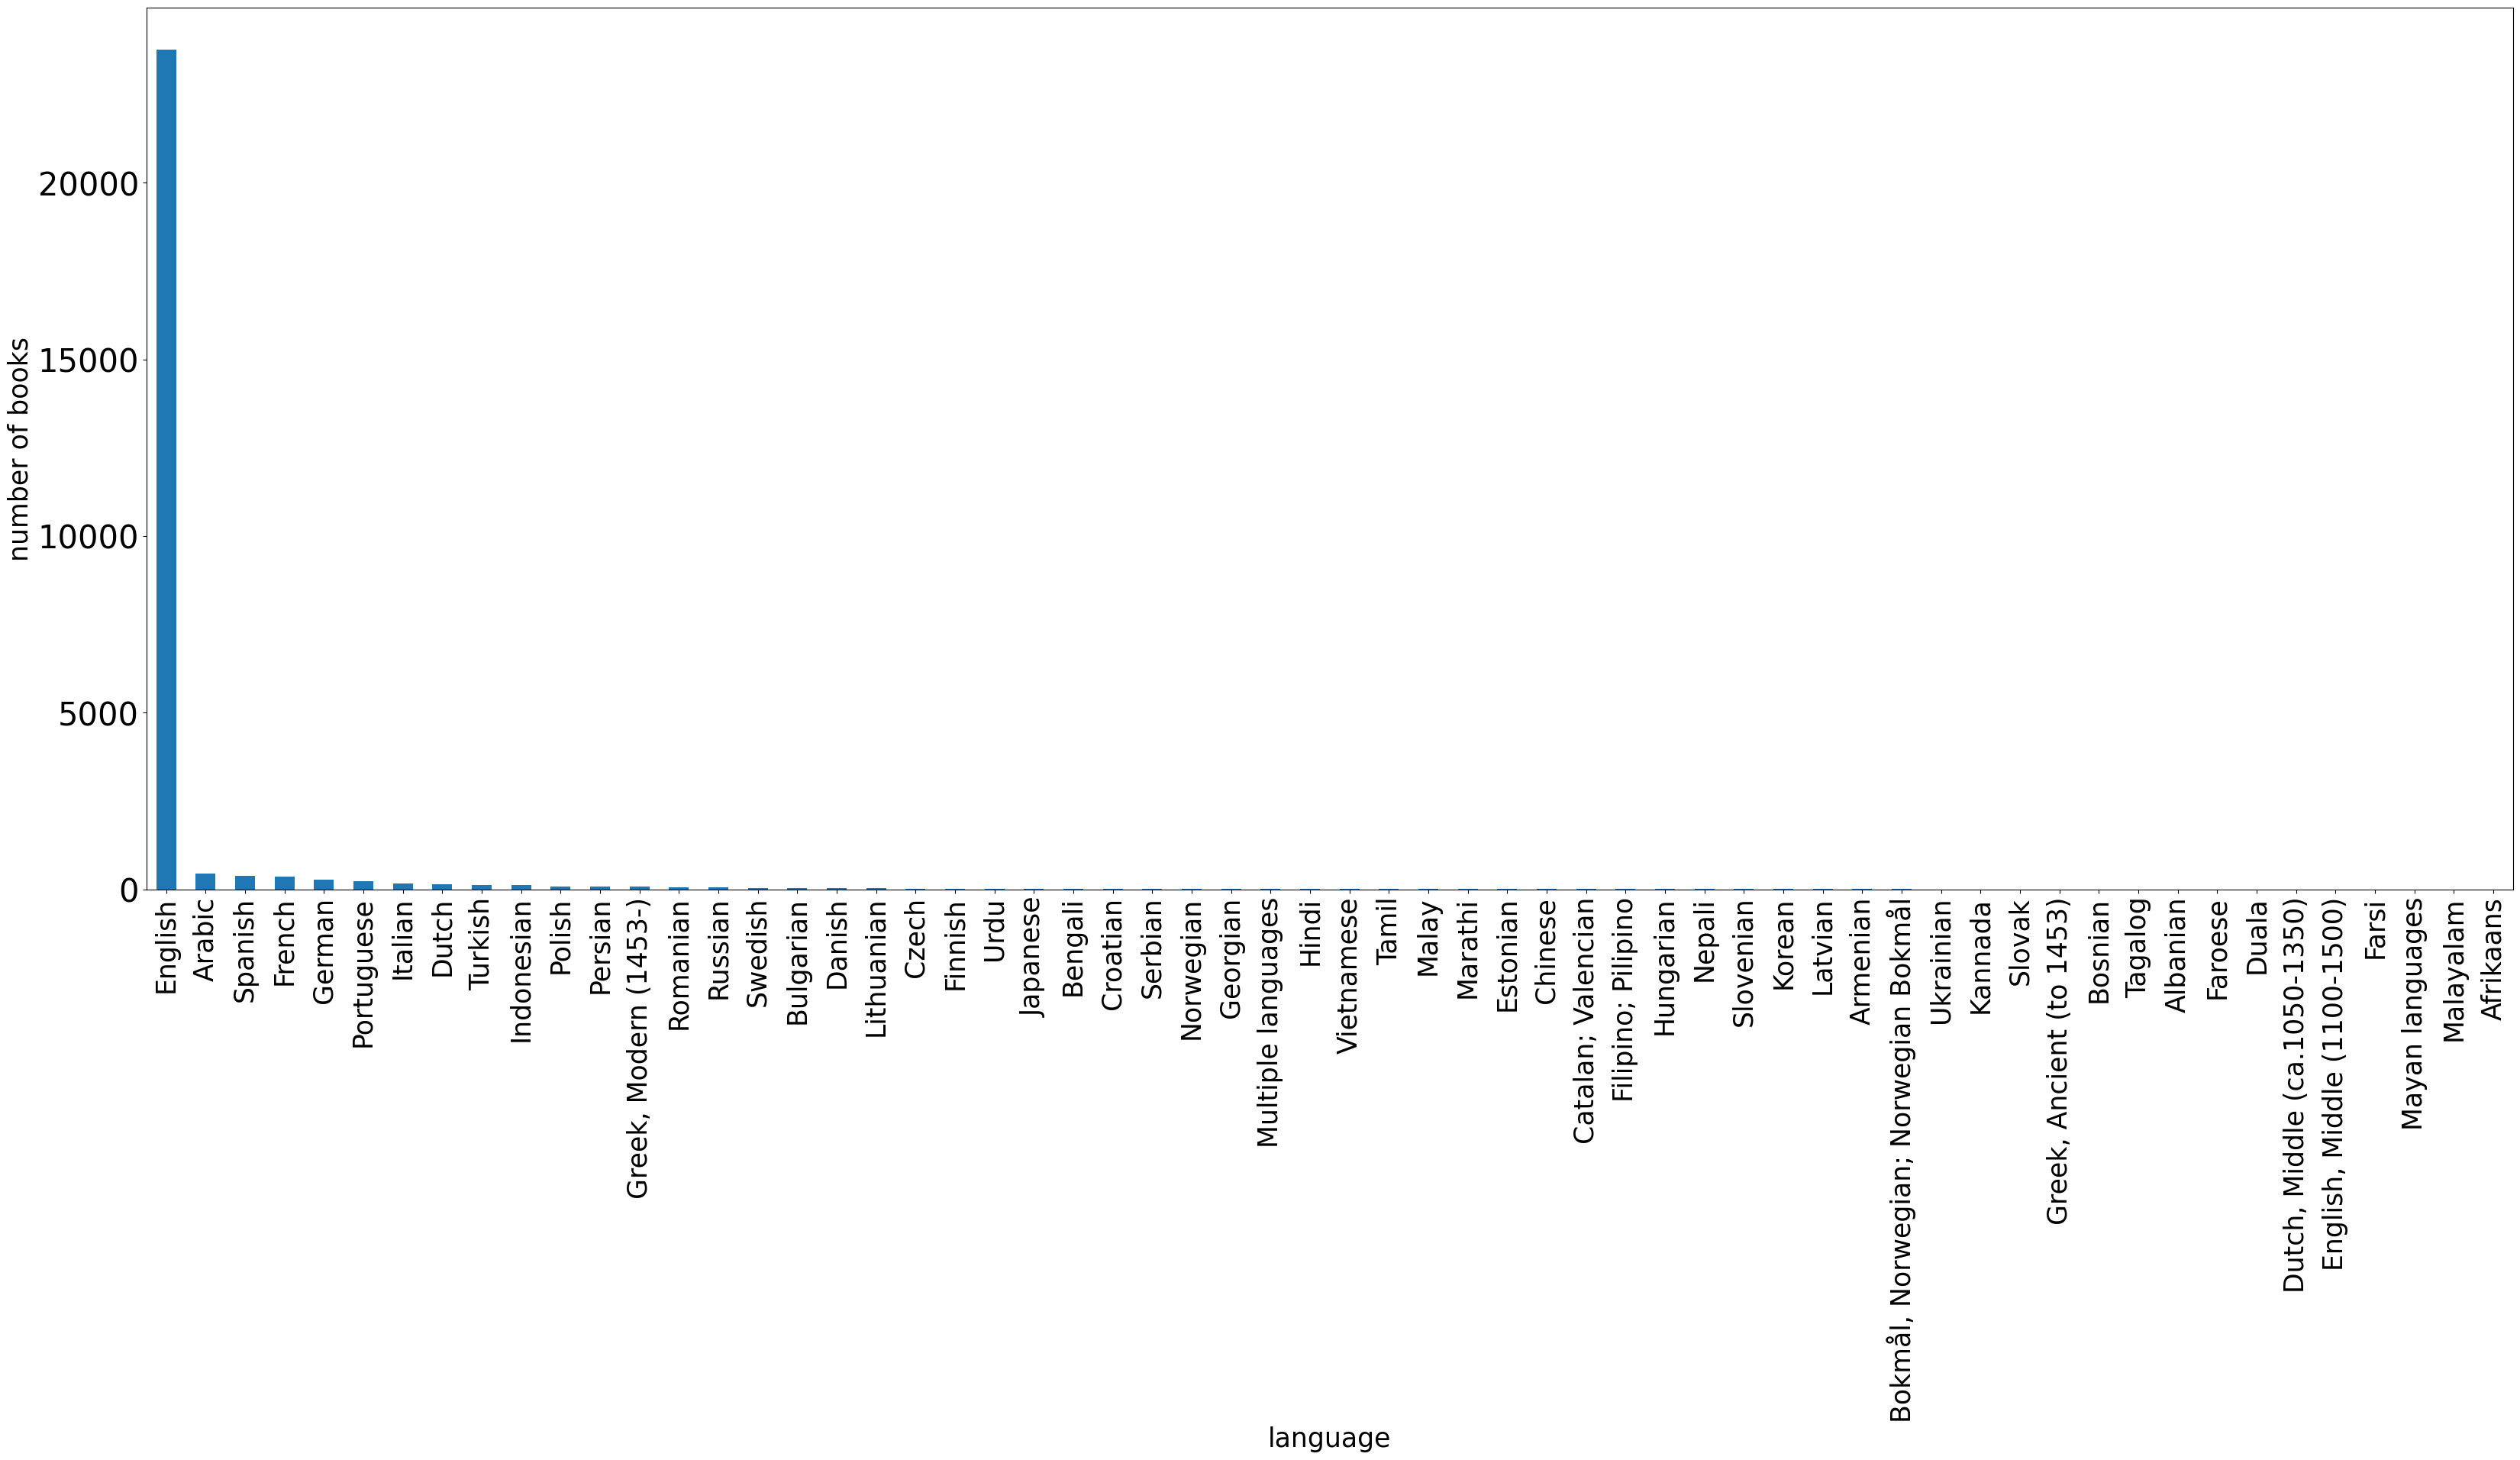

In [10]:
# 8
percentages = dataframe.value_counts('language').sort_values(ascending=False)    # Count how many are: 'Single', 'Together', 'Married', 'Divorced', 'Widow'

fig, ax = plt.subplots(1, 1, figsize=[40, 15])
percentages.plot.bar(x='language',rot=0)      

plt.yticks(fontsize=30)
plt.xticks(fontsize=25)
plt.xticks(rotation = 90)

ax.set_xlabel("language", fontsize=25)
ax.set_ylabel("number of books", fontsize=25)

plt.show()

del percentages

$ $ 

**9.** $ \ \ \ $  Οι 10 εκδότες με τις περισσότερες εκδόσεις βιβλίων είναι: 
$ $

$\ \ \ \ \ \ $ **1**.$ $ Vintage
$ $

$\ \ \ \ \ \ $ **2**.$ $ Penguin Books
$ $

$\ \ \ \ \ \ $ **3**.$ $ Ballantine Books
$ $

$\ \ \ \ \ \ $ **4**.$ $ HarperCollins
$ $

$\ \ \ \ \ \ $ **5**.$ $ Bantam
$ $

$\ \ \ \ \ \ $ **6**.$ $ Penguin Classics
$ $

$\ \ \ \ \ \ $ **7**.$ $ Pocket Books
$ $

$\ \ \ \ \ \ $ **8**.$ $  Del Ray
$ $

$\ \ \ \ \ \ $ **9**.$ $  Harper Perennial
$ $

$\ \ \ \ \ \ $ **10**.$ $ Tor Books

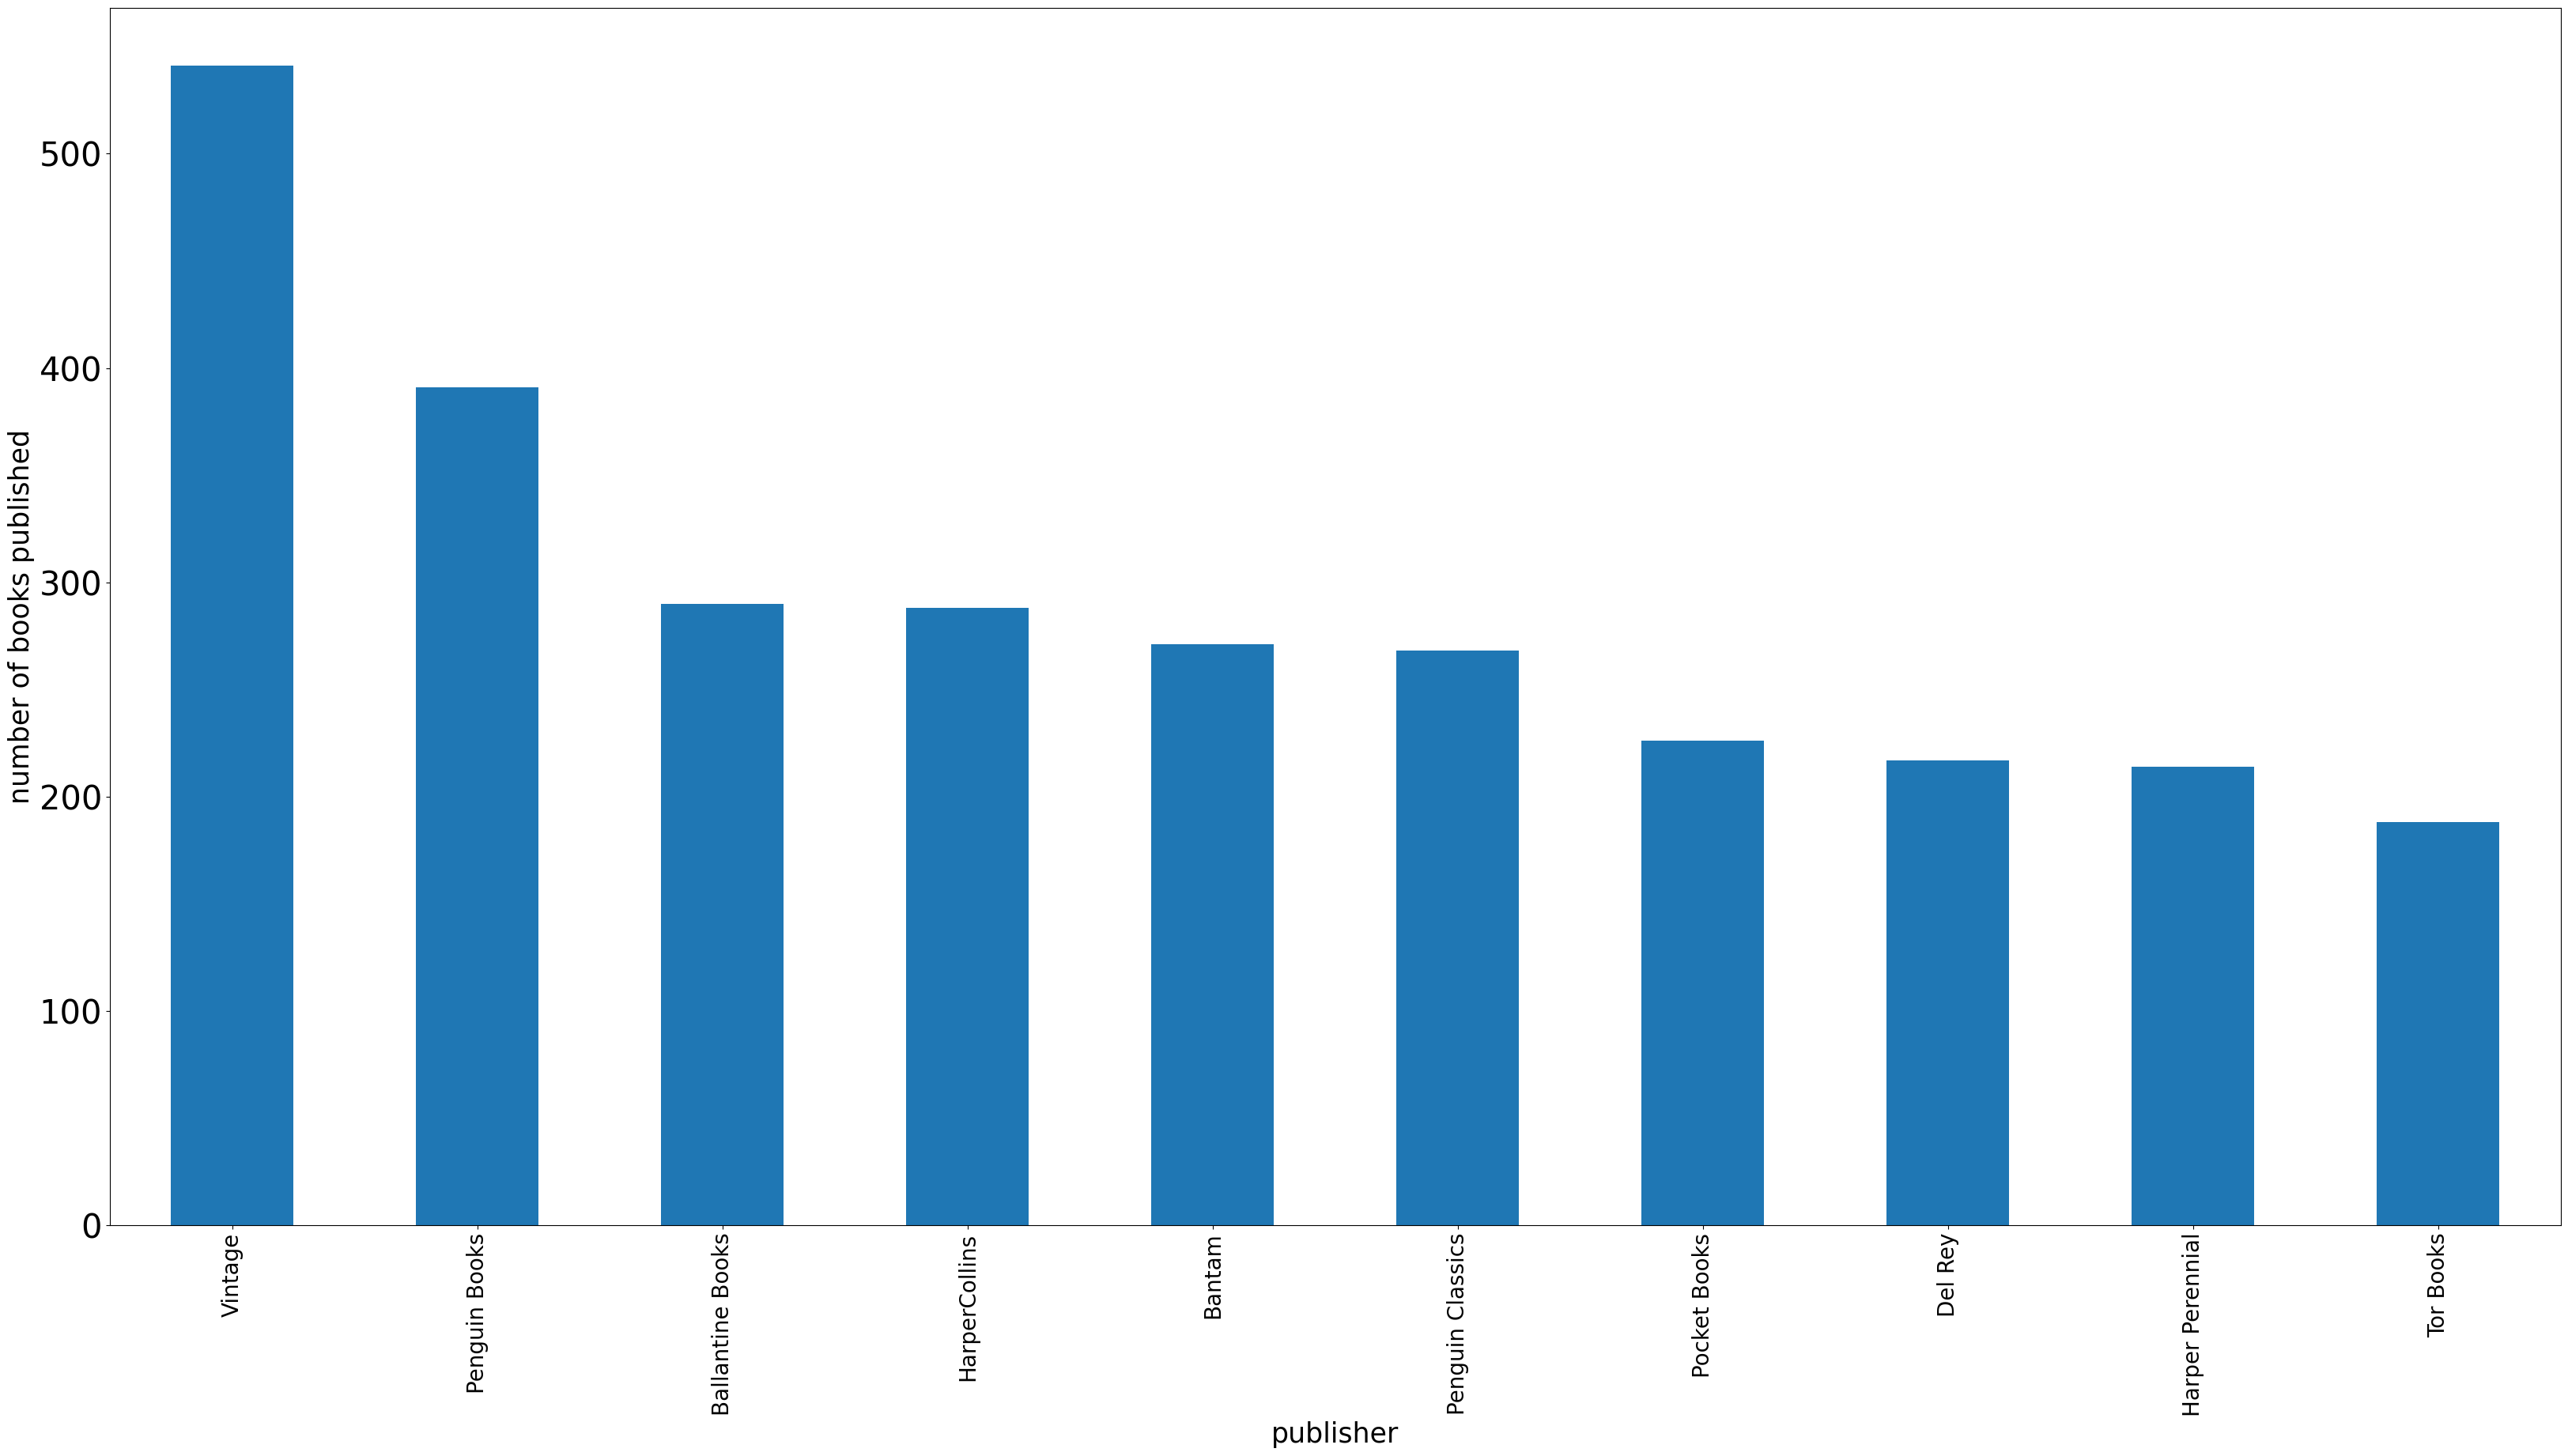

In [11]:
#9
percentages = dataframe.value_counts('publisher').sort_values(ascending=False)  
percentages = percentages.head(10)

fig, ax = plt.subplots(1, 1, figsize=[40, 20])
percentages.plot.bar(x='language',rot=0)      

plt.yticks(fontsize=30)
plt.xticks(fontsize=20)
plt.xticks(rotation = 90)

ax.set_xlabel("publisher", fontsize=25)
ax.set_ylabel("number of books published", fontsize=25)
plt.show()

del percentages

**10.** $ \ \ \ $  Παρατηρούμε ότι όσο λιγότερες σελίδες έχει ένα βιβλίο τόσα υψηλότερα ratings έχει.

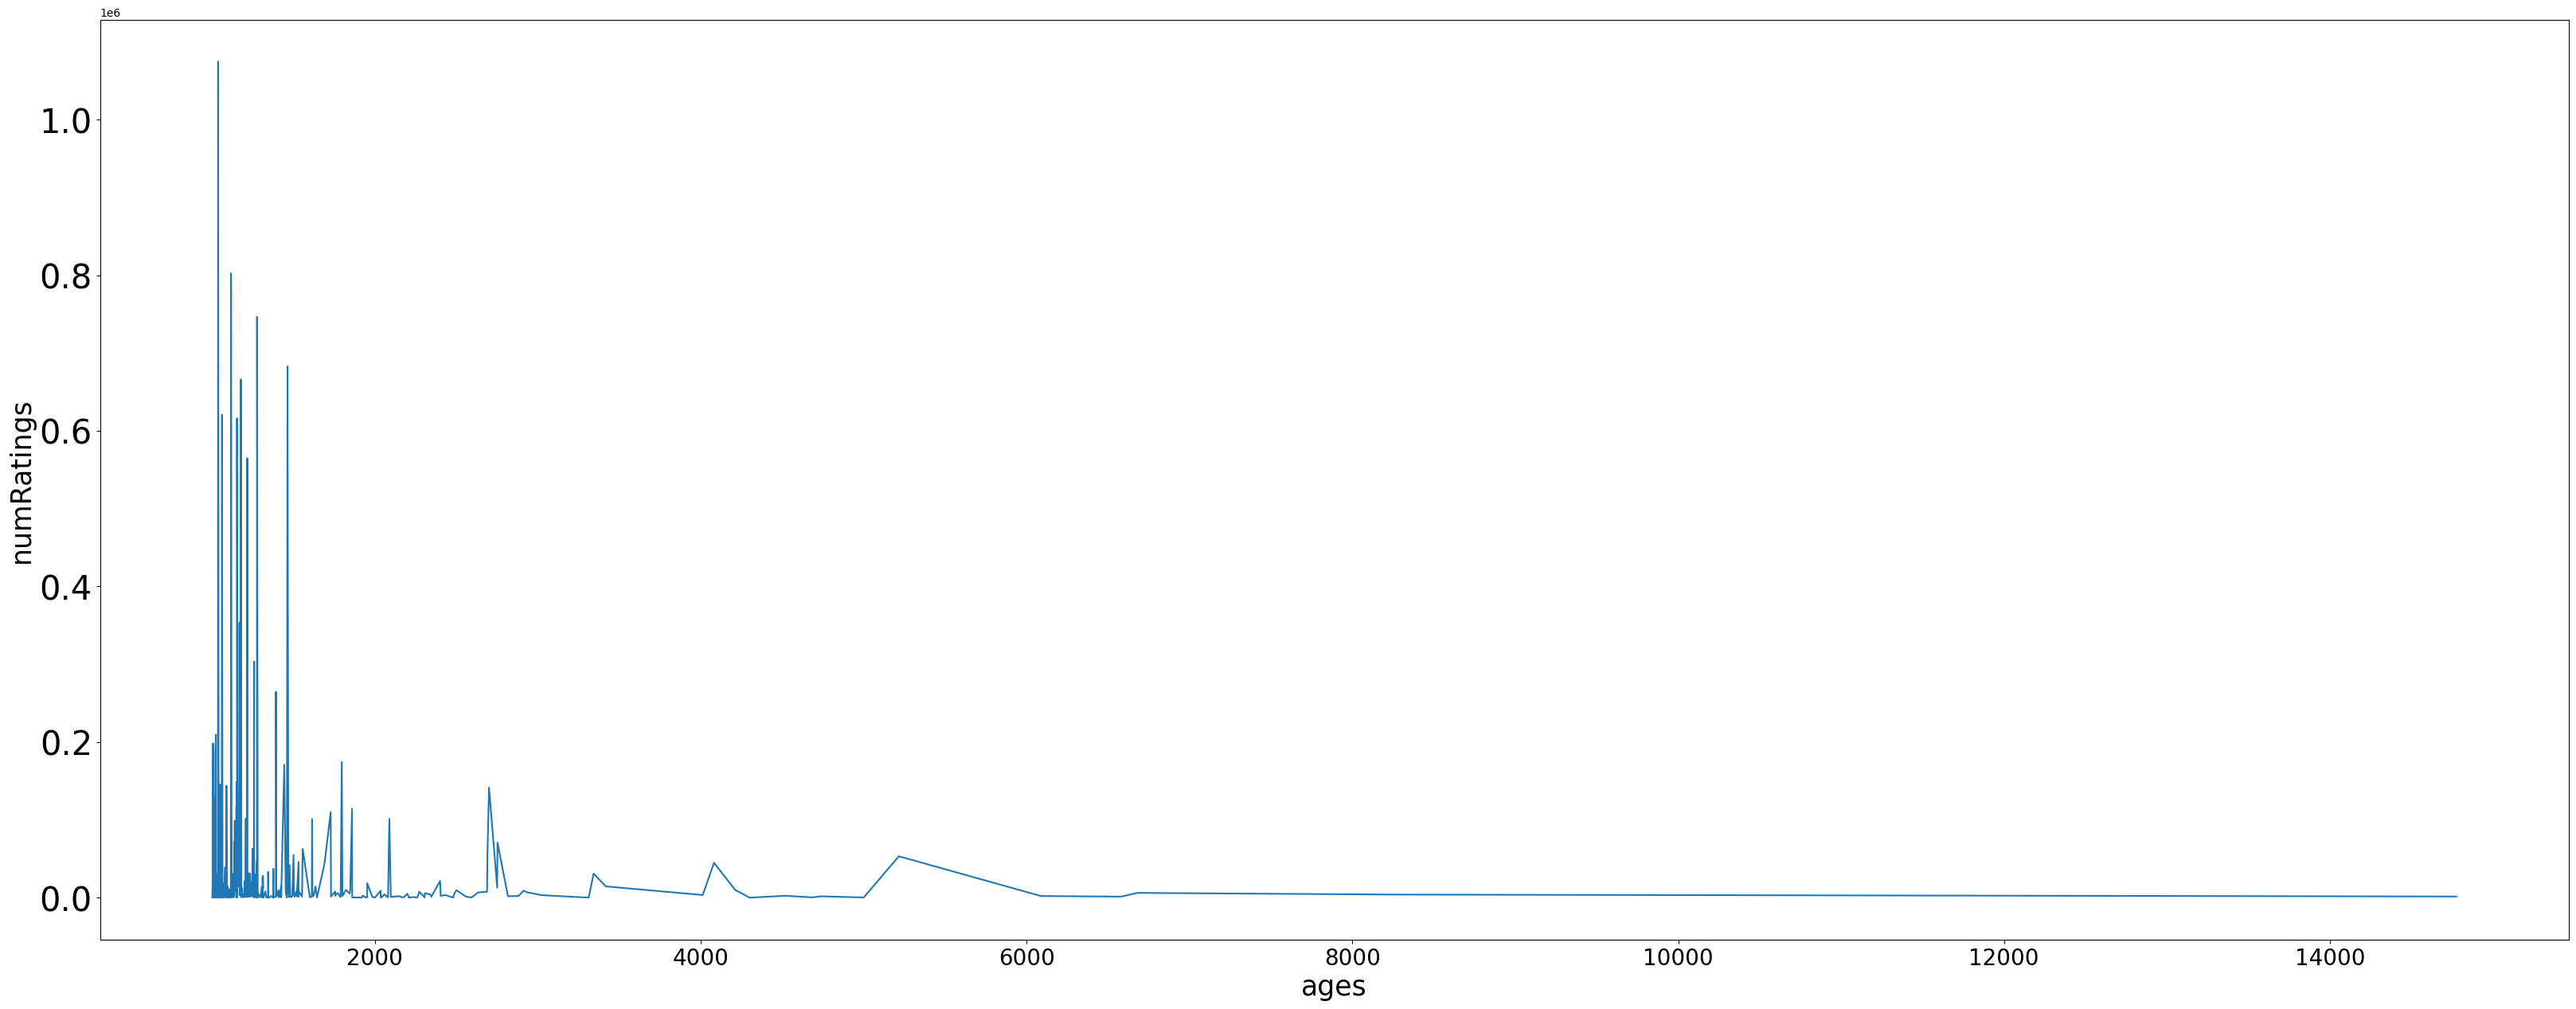

In [12]:
#10
df = dataframe[['numRatings', 'numeric_pages']].copy()
df = df[(df[['numeric_pages']] > 1000).all(axis=1)]

df = df.sort_values(by = ['numeric_pages'], ascending=False)

fig, ax = plt.subplots(1, 1, figsize=[40, 15])
plt.plot(df['numeric_pages'], df['numRatings'])

plt.yticks(fontsize=30)
plt.xticks(fontsize=20)

ax.set_xlabel("ages", fontsize=25)
ax.set_ylabel("numRatings", fontsize=25)

plt.show()

del df

$ $ 
**13.**

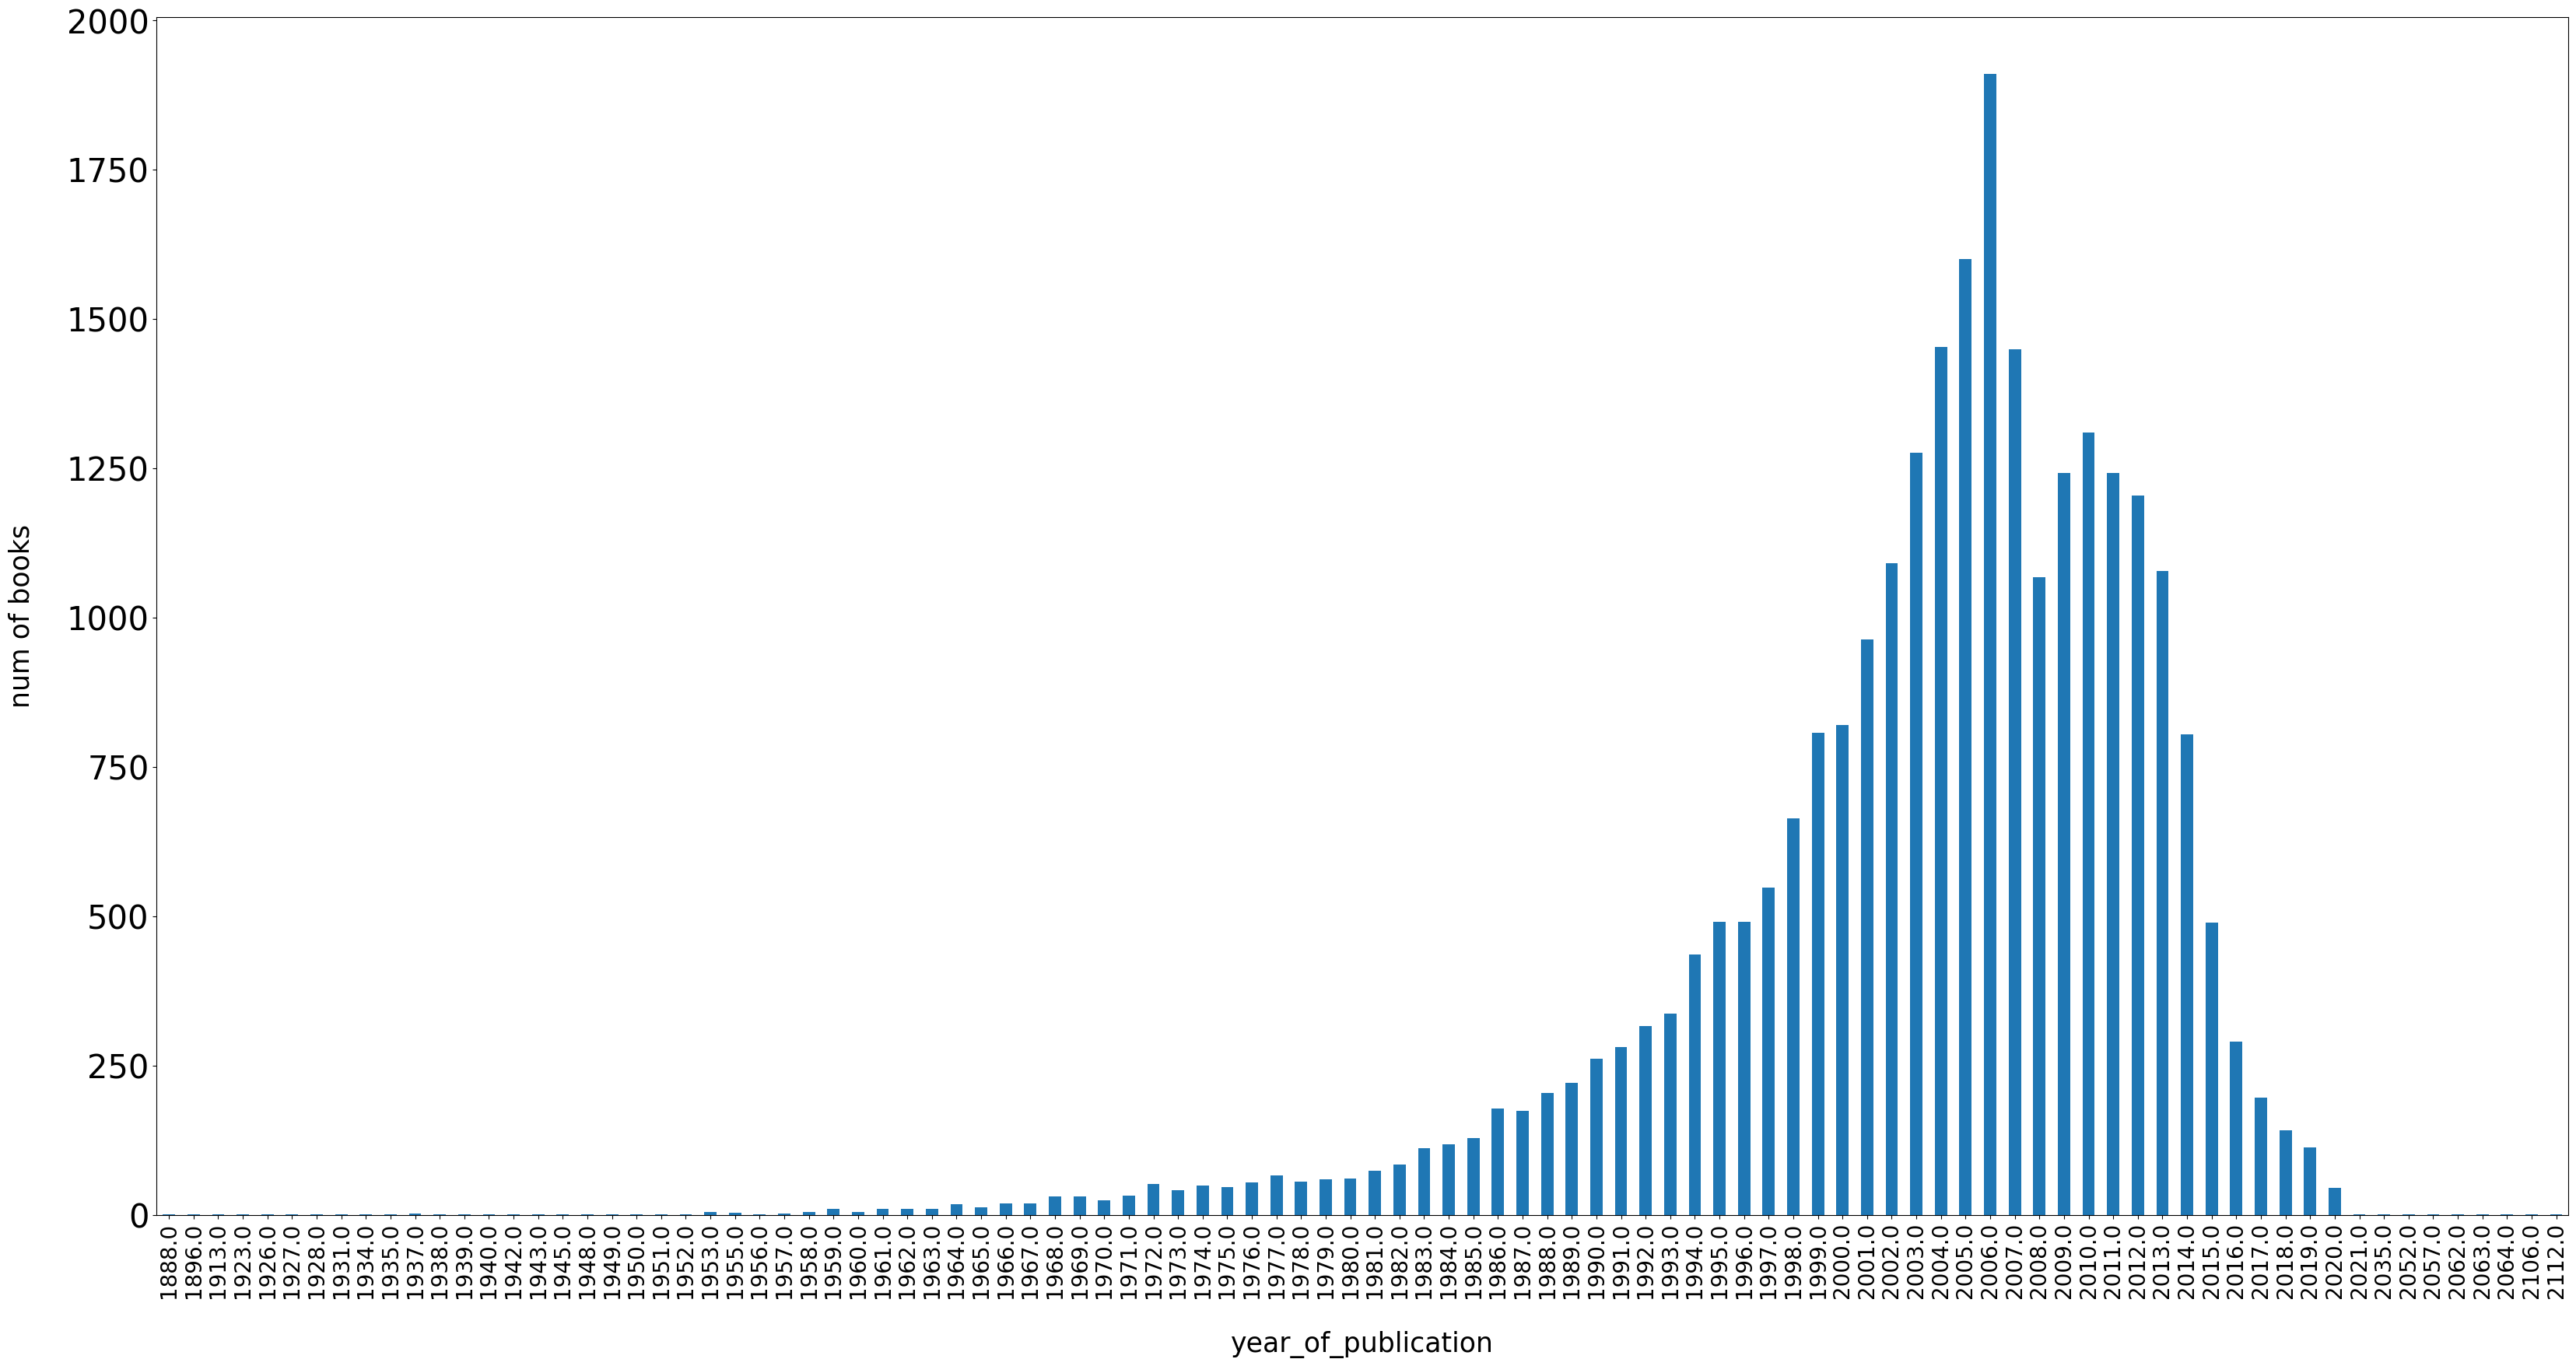

In [13]:
# 13.
dataframe['numeric_year_of_publication'] = pd.to_numeric(dataframe['year_of_publication'])
percentages = dataframe.value_counts('numeric_year_of_publication').sort_index()  # Count how many are: 'Single', 'Together', 'Married', 'Divorced', 'Widow'

fig, ax = plt.subplots(1, 1, figsize=[40, 20])
percentages.plot.bar(x = 'numeric_year_of_publication', rot = 90)      

plt.yticks(fontsize=30)
plt.xticks(fontsize=20)

ax.set_xlabel("year_of_publication", fontsize=25, labelpad=30)
ax.set_ylabel("num of books", fontsize=25, labelpad=30)
plt.show()


# Recomendation

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Δημιουργία νέου dataframe, με όνομα copydf1, όπου του αντιγράφονται 
# οι στήλες ('bookId', 'title', 'description', 'language') του dataframe
copydf1 = dataframe[['bookId', 'title', 'description', 'language']].copy()

# με βάση τη στήλη 'language' επιλέγονται οι γραμμές που έχουν γλώσσα "English"
copydf1 = copydf1[(copydf1[['language']] == 'English' ).all(axis=1)]
del copydf1['language']   # δεν χρειάζεται πλέον η στήλη 'language', οπότε τη διαγράφουμε!

# αφού έχουν οριστεί οι κατάλληλες γραμμές, δημιουργούμε μια νέα στήλη 'index', όπου κρατάει τον index αριθμό της κάθε γραμμής, αυτή 
# η πληροφορία θα είναι βοηθητική για την εύρεση των μελλοντικών ζητούμενων βιβλίων στον πίνακα ποσοστών ομοιοτήτων cosine similarity
rows, cols = copydf1.shape 
list_num = [i for i in range(rows)]
copydf1['index'] = list_num

# δημιουργία TF-IDF πίνακα των unigrams και των bigrams για την στήλη 'description'
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, ngram_range = (1, 2), stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(copydf1['description'])

# υπολογισμός ομοιότητας βιβλίων μεταξύ τους
cosine_sim =  cosine_similarity(tfidf, tfidf)


$ $

Η συνάρτηση BooksRecommendation( ) επιστρέφει μία λίστα με τα ονόματα, των Ν πιο όμοιων βιβλίων ενός δοθέντος βιβλίου.Λαμβάνει ως είσοδο το αναγνωριστικό id του βιβλίου που θέλουμε να βρούμε τα πιο όμοια βιβλία με αυτό, το πλήθος τους, το dataframe, ώστε να έχουμε πρόσβαση στις πληροφορίες των βιβλίων, καθώς και τον πίνακα ποσοστών ομοιότητας cosine_sim, όπου είναι σημαντικό δεδομένο για την εύρεση των ζητούμενων βιβλίων.

In [33]:
def BooksRecommendation(item_id:str, N: int, dataframe: pd.DataFrame, cosine_sim: np.ndarray) -> list:
  """
  The BooksRecommendation() function returns a list of the titles 
  of the N most  similar books of a given book.
  """
  
  # εξαγωγή της γραμμής στην οποία βρίσκεται το δεδομένο βιβλίο με βάση την στήλη 'bookId' 
  book_info = dataframe.loc[dataframe["bookId"] == item_id]

  # εξαγωγή των ποσοστών ομοιότητας του βιβλίου με τα υπόλοιπα από τον πίνακα cosine_sim (με τη χρήση του index του βιβλίου)
  index = book_info['index']
  similarity_scores = list(enumerate(cosine_sim[int(index)])) # εξαγωγή πληροφοριών σε μορφή λίστας 
 
  similarity_scores = sorted(similarity_scores, key=lambda element: element[1], reverse=True) # ταξινόμηση λίστας κατά φθίνουσα σειρά score

  # εύρεση των N πιο όμοιων βιβλίων και αποθήκευση των τίτλων τους στη λίστα BooksRecommended
  BooksRecommended = []
  books_counter = 0
  for element in similarity_scores:
      
        #  εάν ο μετρητής βιβλιών είναι 0 τότε είναι ο βρόχος εξέτασης του ίδιου του 
        #  δοθέντος βιβλίου, δε το θέλουμε -- οπότε -->> μεταβαίνουμε στον επόμενο βρόχο!
        if dataframe['bookId'].iloc[element[0]] == item_id: 
          pos = books_counter
          books_counter = books_counter +1 
          continue
        
        # αποθήκευση όμοιου βιβλίου
        BooksRecommended.append(dataframe['title'].iloc[element[0]])
        books_counter = books_counter + 1 
        
        # όταν βρεθεί το ζητούμενο πλήθος βιβλίων -- σταματάμε -->> την εξέταση και άλλων όμοιων βιβλίων 
        if books_counter > N :
               break 
 
  # εκτύπωση πληροφοριών όμοιων βιβλίων
  print(f"Recommending books {N} similar to: {book_info.iloc[0]['title']}")
  print('-----------------------------------------------------\n')
  for i in range(len(BooksRecommended)):
    
    recom_book_info = dataframe.loc[dataframe['title'] == BooksRecommended[i]]
    
    print(f"Recommmended: {recom_book_info.iloc[0]['title']}")
    
    print(f"Description: {recom_book_info.iloc[0]['description']}")
    
    if i >= pos: print(f'(score: {similarity_scores[i+1][1]})\n')
    else: print(f'(score: {similarity_scores[i][1]})\n')

  return BooksRecommended 

In [34]:
id = "2681467-the-aristocats"
recommended_books = BooksRecommendation(id, 5, copydf1, cosine_sim)
print(recommended_books)

Recommending books 5 similar to: The Aristocats
-----------------------------------------------------

Recommmended: Disney's Robin Hood (Disney's Classic Storybook)
Description: Relive Walt Disney's 21st full-length animated feature in this beautiful, hardcover, 96-page classic storybook that accurately captures the movie magic and places it right into a child's hands. With every turn of a page, adventure unfolds to create memories that will last a lifetime.
(score: 1.0000000000000002)

Recommmended: The Black Cauldron
Description: Taran, the Assistant Pig-Keeper, and his friends are led into a mortal struggle with Arawn and his deathless warriors. Taran must wrest the black cauldron from them, for it is the cauldron that gives them their evil strength. But can he withstand the three enchantresses, who are determined to turn him and his companions into toads? Taran has not foreseen the awful price he will have to pay in his defence of Prydain...
(score: 1.0000000000000002)

Recommmend

$ $ 

Εύρεση των 100 πιο όμοιων βιβλίων 

In [35]:
bookIds = copydf1["bookId"].tolist() 

# Επειδή ο πίνακας cosine_sim είναι συμμετρικος ως προς τη διαγώνιο, θα πρέπει 
# να διασχίσουμε μόνο τα στοιχεία που βρίσκονται πάνω από την διαγώνιο, ώστε να 
# αποτρέψουμε την παραγωγή και την εξέταση συμμετρικών ζευγαριών.
# Για να το πετύχουμε αυτό, μηδενίζουμε τις θέσεις της διαγωνίους και κάτω από αυτή.

# μηδενισμός θέσεων που ανήκουν στη διαγώνιο και κάτω από αυτή 
cosine_sim = np.triu(cosine_sim, 1)

most_similar_books = {}
index = 0 
for csimilarity in cosine_sim:

  similarity_scores = list(enumerate(csimilarity)) # μετατροπή γραμμής σε λίστα
  
  max_score = similarity_scores[index][1]

  # μετατροπή της λίστας σε dictionary και ταξηνόμηση του σε φθίνουσα σειρά, ώστε να εξάγουμε το στοιχείο της γραμμής με το μεγαλύτερο ποσοστό  
  auxiliary_dict = dict(similarity_scores)
  sorted_auxiliary_dict_byValue = sorted(auxiliary_dict.items(), key=lambda element: element[1], reverse=True)
  sorted_auxiliary_dict = dict(sorted_auxiliary_dict_byValue)
  
  maxscore_index = list(sorted_auxiliary_dict.keys())[0]
  

  if max_score < sorted_auxiliary_dict[maxscore_index]:
    max_score = sorted_auxiliary_dict[maxscore_index]
  
  # ανανέωση του most_similar_books λεξικού με το μέγιστο ποσοστό ομοιότητας δύων συγκρινόμεων βιβλίων
  if bookIds[maxscore_index] != bookIds[index]:
    most_similar_books[(bookIds[maxscore_index], bookIds[index])] = max_score
  
  index = index + 1

# με βάση το score ομοιότητας ταξινομούμε το λεξικό most_similar_books σε φθίνουσα σειρά και στην συνέχεια εξάγουμε τα 100 από αυτά
sorted_most_similar_books_byValue = sorted(most_similar_books.items(), key=lambda element: element[1], reverse=True)
sorted_most_similar_books_100 = sorted_most_similar_books_byValue[0:100]
the_hundred_most_similar_books = dict(sorted_most_similar_books_100)

print("\n\t \t BookId1 \t \t \t \t   - \t \t \t \t \t   BookId2 \t \t \t \t \t \t \t \t \t     | \t \t Similarity Score")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------")
for x, y in the_hundred_most_similar_books.items():
  print("{:<90}{:<90} | \t       {:< 10} ".format(x[0], x[1], y))



	 	 BookId1 	 	 	 	   - 	 	 	 	 	   BookId2 	 	 	 	 	 	 	 	 	     | 	 	 Similarity Score
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------
672616.Dead_In_The_Water                                                                  271296.A_Cold_Blooded_Business                                                             | 	        1.0000000000000004 
167604.Messages_from_the_Masters                                                          34452.Many_Lives_Many_Masters                                                              | 	        1.0000000000000002 
93370.Akira_Vol_2                                                                         93371.Akira_Vol_1                                                                          | 	        1.0000000000000002 
561291.Romance_of_the_Three_Kingdoms_Vol_2_of_2     

# Υλοποίηση Κατηγοροποίησης (Classification)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import contractions
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


$ $

**Εύρεση των 10 πιο συχνών κατηγοριών**

In [15]:
# --- 10 πιο συχνές κατηγορίες genre ---

# Υπολογισμός των εμφανίσεων του κάθε είδους. 
bow_vectorizer = CountVectorizer(lowercase=False)
bow_xtrain = bow_vectorizer.fit_transform(dataframe['genreSingle'])
b = bow_xtrain.toarray()
k = np.sum(b, axis=0)  


feature_genres = bow_vectorizer.get_feature_names_out()

# Δημιουργία dictionary με το όνομα του είδους και το πλήθος των εμφανίσεων τους.
genre_appear = dict(zip(feature_genres, k))

# Ταξινόμηση του dictionary κατά φθίνουσα σειρά με βάση το πλήθος των εμφανήσεων του είδους.
sortedDict = dict(sorted(genre_appear.items(), key=lambda item: item[1]))
sortDescOrder =dict(reversed(list(sortedDict.items())))

# Εξαγωγή των 10 πιο συχνών κατηγοριών.
count = 0
Ten_mostCommon_genres_keys = [] 
for key in sortDescOrder.keys():

  if(count == 10) : break
  else:
    Ten_mostCommon_genres_keys.append(key)
    count = count+1

Ten_mostCommon_genres = {key: genre_appear[key] for key in Ten_mostCommon_genres_keys}

# δημιουργία νέου dataframe με στήλες 'bookId', 'description', 'genreSingle' και επιλογή γραμμών με βάση των 10 πιο συχνών κατηγοριών
new_dataframe = dataframe[['bookId', 'description', 'genreSingle']].copy()
new_dataframe = new_dataframe[new_dataframe['genreSingle'].isin(Ten_mostCommon_genres_keys)]

$ $


**Καθαρισμός δεδομένων** 
$ $

Στη συνέχεια, αφού βρούμε τις 10 πιο συχνές κατηγορίες, καθαρίζουμε τα δεδομένα, όπου αφαιρούμε αρχικά τα contractions, ώστε να σχηματίσουμε ολόκληρες λέξεις, κατανοητές για την ανίχνευση. Στην συνέχεια αφαιρούμε σημεία στίξης και διάφορα σύμβολα που περιέχονται στο κείμενο.Κατόπιν αφαιρούμε και τους αριθμούς. Έπειτα μετατρέπουμε όλες τις λέξεις των κειμένων σε πεζά γράμματα (θα μπορούσμαμε και σε κεφαλαία), αυτό γίνεται καθώς το σύστημα κάνει διάκριση μεταξύ πεζών και κεφαλαίων γραμμάτων. Αυτό σημαίνει, ότι οι λέξεις, πρέπει να είναι συνεπής στην κεφαλαιοποίηση γραμμάτων. Τέλος αφαιρούμε τις stop_words, οι οποίες δεν μας είναι χρήσιμες.

In [16]:
# 1. Μετατροπή των contractions σε ολοκληρομένες λέξεις:
def fixContractions(string):
  string = contractions.fix(string)
  return string 

new_dataframe['description'] = new_dataframe.apply(lambda row: fixContractions(row['description']), axis=1)


# 2. Αφαίρεση όλων των συμβόλων
def strip_everything(ww):
  w1 = re.sub("['-+:()[]{}!?$%^&*_~\;/《》.`+=#@]|‘、,。”",'', ww)
  return w1

new_dataframe['description'] = new_dataframe.apply(lambda row: strip_everything(row['description']), axis=1)


# 3. Αφαίρεση αριθμών 
def remove_numbers(string):
  string = re.sub(r"\d+",'' , string)
  return string

new_dataframe['description'] = new_dataframe.apply(lambda row: remove_numbers(row['description']), axis=1)

# 4. Μετατροπή όλων των λέξεων σε πεζά γράμματα
def lowercase(string):
  string2 = string.lower()
  return string2

new_dataframe['description'] = new_dataframe.apply(lambda row: lowercase(row['description']), axis=1)


# 5. Αφαίρεση stop_words
stop_words = stopwords.words('english')
new_dataframe['description'] = new_dataframe['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


$ $

**Δημιουργία διανυσμάτων λέξεων** 

In [17]:
from gensim.models import Word2Vec

# Διάσπαση κειμένου σε λέξεις και αποθήκευση τους σε μία λίστα
word_set = []
for col in new_dataframe.description:
   word_list = col.split(" ")
   word_set.append(word_list)

# Αρχικοποίηση και εκπαίδευση του μοντέλου Word2Vec
model_w2v = Word2Vec(
    word_set,
    vector_size=300,    # desired no. of features/independent variables
    window = 5,    # context window size
    workers = 10   # no.of cores
  )


#  Αφαίρεση κενής λέξης έαν υπάρχει στο λεξικό λέξεων του μοντέλου Word2Vec!
if '' in model_w2v.wv.index_to_key:
  model_w2v.wv.index_to_key.remove('')


list_keys = model_w2v.wv.index_to_key
FeaturesVecs = {}   # εδώ θα αποθηκεύσουμε τα διανύσματα
count = 0

#  Για κάθε description δημιουργούμε ένα διάνυσμα μεγέθους 300 τιμών, όπου αναπαριστά τον μέσο όρο των embeddings των λέξεων του description 
for words in word_set:
  
  # Αρχικοποίηση ενός πίνακα μεγέθους (1x300), με μηδενικά
  featureVec = np.zeros((300,))
  num_of_words = 0   # μετρητής λέξεων του description που ανήκουν στο λεξικό του μοντέλου
  
  # για κάθε λέξη του description εξετάζεται αν ανήκει στο λεξικό του μοντέλου, εαν ναι προστίθεται η λέξη στον πίνακα featureVec
  for word in words:
    
    if word in list_keys:
      num_of_words = num_of_words + 1
      featureVec = np.add(featureVec, model_w2v.wv[word])
  
  # κάθε διάνυσμα αποοθηκεύεται στο λεξικό FeaturesVecs
  FeaturesVecs[count] = featureVec / num_of_words
  count = count + 1

$ $

**Αποθήκευση χαρακτηριστικών στο αρχείο FeaturesDataPickle.pkl και κατόπιν ανάγνωση του δημιουργηθέντος αρχείου .pkl και εξαγωγή δεδομένων.** 

In [18]:
import pickle
FeaturesData = open('FeaturesDataPickle', 'ab')
pickle.dump(FeaturesVecs, FeaturesData)

In [19]:
FeaturesData = open('FeaturesDataPickle', 'rb')     
FeaturesVecs = pickle.load(FeaturesData)

In [20]:
data = pd.DataFrame.from_dict(FeaturesVecs, orient='index')

$ $

**Χωρισμός δεδομένων σε train 80% και test 20%**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()     # αρχικοποίηση LabelEncoder
new_dataframe['genreSingle'] = labelencoder.fit_transform(new_dataframe['genreSingle'])   # εφαρμογή και μετασχηματισμός

# διαγραφή κενών γραμμών 
data['genreSingle'] = new_dataframe['genreSingle']
data = data.dropna()

y = data['genreSingle']
del data['genreSingle']
x = data.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [22]:
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
import time

#### Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

print("\n=======================     Naive Bayes     =======================\n")
naiveBayes = GaussianNB().fit(x_train, y_train)

end = time.time()

total_training_time = end - start
print(f"The total training time of NaineBayes is: {total_training_time} s")


print("\n---------------   10-fold Cross Validation: scores   ---------------\n")
naiveBayes_score = cross_val_score(naiveBayes, x_train, y_train, cv=10, scoring='accuracy')
print(f"Accuracy: {naiveBayes_score}")
print(f"\nAverage Accuracy: {naiveBayes_score.mean()*100:.2f} %")
print(f"\nAverage std: {naiveBayes_score.std()*100:.2f} % \n")

y_pred = cross_val_predict(naiveBayes, x_train, y_train, cv=10)
print(classification_report(y_train, y_pred))

print("\n\n---------------   Predicting on Test Data: scores   ---------------\n")
naiveBayes_pred = naiveBayes.predict(x_test) 

accuracy = accuracy_score(y_test, naiveBayes_pred)
print (f"Average accuracy: {accuracy*100:.2f} %\n")

print(classification_report(y_test, naiveBayes_pred))



=======================     Naive Bayes     =======================

The total training time of NaineBayes is: 0.015505552291870117 s

---------------   10-fold Cross Validation: scores   ---------------

Accuracy: [0.12094395 0.12389381 0.12389381 0.13864307 0.1179941  0.12094395
 0.0560472  0.1179941  0.1179941  0.13569322]

Average Accuracy: 11.74 %

Average std: 2.16 % 

              precision    recall  f1-score   support

         0.0       0.13      0.87      0.22       407
         1.0       0.28      0.01      0.02       844
         2.0       0.33      0.00      0.00      1365
         4.0       0.09      0.12      0.10       212
         5.0       0.08      0.01      0.02       314
         6.0       0.04      0.01      0.01       218
         7.0       0.00      0.00      0.00        30

    accuracy                           0.12      3390
   macro avg       0.14      0.15      0.06      3390
weighted avg       0.23      0.12      0.04      3390



---------------   Pred

#### Support Vector Machines


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

$ $

***GridSearchCV***

In [25]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}
svc = svm.SVC()
svm_classifier = GridSearchCV(svc, parameters)
svm_classifier.fit(x_train, y_train)
svm_classifier.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

$\bullet \ \ \ \  \underline{RBF}$

In [26]:
# Μη Γραμμική Μηχανή Διανυσμάτων Υποστήριξης
start = time.time()

print("\n=======================     SVM:RBF     =======================\n")
RBFSVMs = SVC(kernel='rbf', C = 100, gamma= 0.0001)
RBFSVMs.fit(x_train, y_train)

end = time.time()

total_training_time = end - start
print(f'The total training time of rbf SupportVectorMachine is: {total_training_time} s')


print("\n---------------   10-fold Cross Validation: scores   ---------------\n")
RBFSVMs_score = cross_val_score(RBFSVMs, x_train, y_train, cv=10, scoring='accuracy')
print(f"Accuracy: {RBFSVMs_score}")
print(f"\nAverage Accuracy: {RBFSVMs_score.mean()*100:.2f} %")
print(f"\nAverage std: {RBFSVMs_score.std()*100:.2f} % \n")

y_pred = cross_val_predict(RBFSVMs, x_train, y_train, cv=10)
print(classification_report(y_train, y_pred))

print("\n\n---------------   Predicting on Test Data: scores   ---------------\n")
RBFSVMs_pred = RBFSVMs.predict(x_test) 

accuracy = accuracy_score(y_test, RBFSVMs_pred)
print (f"Average accuracy: {accuracy*100:.2f} %\n")

print(classification_report(y_test, RBFSVMs_pred))



=======================     SVM:RBF     =======================

The total training time of rbf SupportVectorMachine is: 2.9194350242614746 s

---------------   10-fold Cross Validation: scores   ---------------

Accuracy: [0.40117994 0.40117994 0.40117994 0.40117994 0.40412979 0.40412979
 0.40412979 0.40412979 0.40412979 0.40117994]

Average Accuracy: 40.27 %

Average std: 0.15 % 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       407
         1.0       0.00      0.00      0.00       844
         2.0       0.40      1.00      0.57      1365
         4.0       0.00      0.00      0.00       212
         5.0       0.00      0.00      0.00       314
         6.0       0.00      0.00      0.00       218
         7.0       0.00      0.00      0.00        30

    accuracy                           0.40      3390
   macro avg       0.06      0.14      0.08      3390
weighted avg       0.16      0.40      0.23      3390



--------------

$\bullet \ \ \ \  \underline{Linear}$

In [27]:
# Γραμμική Μηχανή Διανυσμάτων Υποστήριξης
start = time.time()

print("\n=======================     SVM:LINEAR     =======================\n")
linearSVMs = SVC(kernel='linear', C = 1, gamma= 0.01)
linearSVMs.fit(x_train, y_train)

end = time.time()

total_training_time = end - start
print(f'The total training time of linear SupportVectorMachine is: {total_training_time} s')


print("\n---------------   10-fold Cross Validation: scores   ---------------\n")
linearSVMs_score = cross_val_score(linearSVMs, x_train, y_train, cv=10, scoring='accuracy')
print(f"Accuracy: {linearSVMs_score}")
print(f"\nAverage Accuracy: {linearSVMs_score.mean()*100:.2f} %")
print(f"\nAverage std: {linearSVMs_score.std()*100:.2f} % \n")

y_pred_linearSVMs = cross_val_predict(linearSVMs, x_train, y_train, cv=10)
print(classification_report(y_train, y_pred_linearSVMs))

print("\n\n---------------   Predicting on Test Data: scores   ---------------\n")
linearSVMs_pred = linearSVMs.predict(x_test) 

accuracy_linearSVMs = accuracy_score(y_test, linearSVMs_pred)
print (f"Average accuracy: {accuracy_linearSVMs*100:.2f} %\n")

print(classification_report(y_test, linearSVMs_pred))


=======================     SVM:LINEAR     =======================

The total training time of linear SupportVectorMachine is: 13.226359605789185 s

---------------   10-fold Cross Validation: scores   ---------------

Accuracy: [0.40117994 0.40117994 0.40117994 0.40117994 0.40412979 0.40412979
 0.40412979 0.40412979 0.40412979 0.40117994]

Average Accuracy: 40.27 %

Average std: 0.15 % 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       407
         1.0       0.00      0.00      0.00       844
         2.0       0.40      1.00      0.57      1365
         4.0       0.00      0.00      0.00       212
         5.0       0.00      0.00      0.00       314
         6.0       0.00      0.00      0.00       218
         7.0       0.00      0.00      0.00        30

    accuracy                           0.40      3390
   macro avg       0.06      0.14      0.08      3390
weighted avg       0.16      0.40      0.23      3390



--------

#### Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

print("\n=======================     RandomForestClassifier     =======================\n")
randomForest = RandomForestClassifier(max_depth=100, n_estimators=200)
randomForest.fit(x_train,y_train)
end = time.time()

total_training_time = end - start
print(f'The total training time of RandomForestClassifier is: {total_training_time} s')

print("\n---------------   10-fold Cross Validation: scores   ---------------\n")
randomForest_score = cross_val_score(randomForest, x_train, y_train, cv=10, scoring='accuracy')
print(f"Accuracy: {randomForest_score}")
print(f"\nAverage Accuracy: {randomForest_score.mean()*100:.2f} %")
print(f"\nAverage std: {randomForest_score.std()*100:.2f} % \n")

y_pred_randomForest = cross_val_predict(randomForest, x_train, y_train, cv=10)
print(classification_report(y_train, y_pred_randomForest))

print("\n\n---------------   Predicting on Test Data: scores   ---------------\n")
randomForest_pred = randomForest.predict(x_test) 

accuracy_randomForest = accuracy_score(y_test, randomForest_pred)
print (f"Average accuracy: {accuracy_randomForest*100:.2f} %\n")

print(classification_report(y_test, randomForest_pred))


=======================     RandomForestClassifier     =======================

The total training time of RandomForestClassifier is: 15.89580488204956 s

---------------   10-fold Cross Validation: scores   ---------------

Accuracy: [0.36578171 0.40117994 0.33038348 0.36578171 0.34218289 0.38053097
 0.36873156 0.34513274 0.37463127 0.39823009]

Average Accuracy: 36.73 %

Average std: 2.20 % 

              precision    recall  f1-score   support

         0.0       0.17      0.02      0.04       407
         1.0       0.24      0.18      0.21       844
         2.0       0.40      0.78      0.53      1365
         4.0       0.00      0.00      0.00       212
         5.0       0.12      0.01      0.02       314
         6.0       0.00      0.00      0.00       218
         7.0       0.00      0.00      0.00        30

    accuracy                           0.36      3390
   macro avg       0.13      0.14      0.11      3390
weighted avg       0.25      0.36      0.27      3390



--

#### **Πίνακας Αποτελεσμάτων Πειραματικών Ελέγχων**

In [29]:
df = pd.DataFrame({'Classification Algorithms': ['NaiveBayes', 'SVM: RBF', 'SVM: Linear', 'Random Forest'],
                   'Accuracy': [0.17, 0.38, 0.38, 0.35],
                   'Precision (macro)': [0.22, 0.05, 0.05, 0.14],
                   'Recall (macro)': [0.15, 0.14, 0.14, 0.14],
                   'F-Measure (macro)': [0.07, 0.08, 0.08, 0.11]})

df.set_index('Classification Algorithms')

,Accuracy,Precision (macro),Recall (macro),F-Measure (macro)
Classification Algorithms,,,,
NaiveBayes,0.17,0.22,0.15,0.07
SVM: RBF,0.38,0.05,0.14,0.08
SVM: Linear,0.38,0.05,0.14,0.08
Random Forest,0.35,0.14,0.14,0.11
